In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mydata=pd.read_csv(r"C:\Users\Rads Gupta\Desktop\Machine Learning A-Z\Part 3 - Classification\Section 15 - K-Nearest Neighbors (K-NN)\K_Nearest_Neighbors\Social_Network_Ads.csv")

In [3]:
mydata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x=mydata.iloc[:,[2,3]].values


In [8]:
y=mydata.iloc[:,4].values

In [9]:
from sklearn.cross_validation import train_test_split


In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [11]:
xtrain.shape


(300, 2)

In [12]:
type(xtrain)

numpy.ndarray

In [13]:
ytrain.shape


(300,)

In [14]:
ytest.shape

(100,)

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
scx=StandardScaler()

In [18]:
xtrain=scx.fit_transform(xtrain)

C:\Users\Rads Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [19]:
xtest=scx.fit_transform(xtest)

C:\Users\Rads Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [20]:
type(xtrain)

numpy.ndarray

In [22]:
from sklearn.neighbors import KNeighborsClassifier


In [23]:
knn=KNeighborsClassifier(n_neighbors=10)


In [24]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [25]:
yp=knn.predict(xtest)

In [26]:
yp

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [27]:
ytest

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [28]:
ytest-yp

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0], dtype=int64)

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
cm=confusion_matrix(ytest,yp)

In [74]:
cm

array([[64,  4],
       [ 3, 29]])

In [75]:
from matplotlib.colors import ListedColormap
xset,yset=xtrain,ytrain


In [76]:
x1,x2=np.meshgrid(np.arange(start=xset[:,0].min()-1,stop=xset[:,0].max()+1, step=0.01),np.arange(start=xset[:,1].min()-1,stop=xset[:,1].max()+1, step=0.01))

In [77]:
x1.shape

(592, 616)

In [78]:
x2.shape

(592, 616)

In [79]:
xset.shape

(300, 2)

In [80]:
plt.contourf(x1,x2,knn.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('yellow','blue')))

In [81]:
plt.xlim(x1.min(), x1.max())

(-2.9931891594584856, 3.1568108405413833)

In [82]:
plt.ylim(x2.min(),x2.max())

(-2.5825424477554764, 3.3274575522443977)

In [83]:
for i,j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset==j,0],xset[yset==j,1],
               c=ListedColormap(('blue','yellow'))(i),label=j)

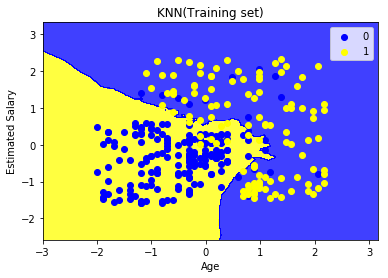

In [84]:
plt.title('KNN(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

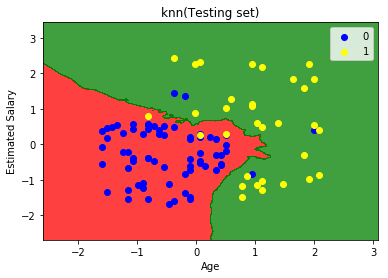

In [90]:
from matplotlib.colors import ListedColormap
xset,yset=xtest,ytest
x1,x2=np.meshgrid(np.arange(start=xset[:,0].min()-1,stop=xset[:,0].max()+1, step=0.01),np.arange(start=xset[:,1].min()-1,stop=xset[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,knn.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset==j,0],xset[yset==j,1],c=ListedColormap(('blue','yellow'))(i),label=j)
plt.title('knn(Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()